In [1]:
#package imports and magic words

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from collections import defaultdict, Counter

In [2]:
#read in dataset and dedupe
df_total = pd.read_csv('tmdb-movies.csv')
df_total.drop_duplicates(inplace = True)
df_total = df_total.reset_index().drop('index', axis = 1)

#Look at general structure of data after load 
df_total.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

## Data Assessment

- Total number of records: 10865 (non-null)
- Features missing records: homepage, tagline, keywords, production_companies, director, genres, overview, and cast.
- Columns containing multiple variables/values: cast, genres, production_companies.
- Column release_date should be a datetime object type.
- Column release_year should be a category type.
- Some records of budget, revenue, budget_adj, and revenue_adj are listed as 0. These values should probably be listed as nulls (np.nan).
- Column id is an indicator and should be string type.
- Only one id column is needed, imdb id can be dropped (ten records are missing).

## Cleaning

- Split cast into invidual columns (cast_1, cast_2, etc).
- Split genres into individual colmuns (genre_1, genre_2, etc).
- Split production_companies into individual colmuns (prod_comp_1, prod_comp_2, etc).
- Convert release_date to datetime object.
- Convert release_year to category type.
- Convert 0s for budget, revenue, budget_adj, and revenue_adj, to np.nan.
- Convert id to string.
- Drop imdb_id from cleaned dataframe.

## Additonal Variables

- Add revenue/budget ratio.
- Add category for revenue levels.

## Data Cleaning

### 1. Save off temp data frame for cleaning

In [4]:
df_clean = df_total.copy()

### 2. Make type conversions and value conversions

- Use .astype, .replace, .to_datetime as needed to make changes to values and types.
- Verify changes with .info.

In [5]:
df_clean.id = df_clean.id.astype('str')
df_clean.release_year = df_clean.release_year.astype('category')
df_clean.release_date = pd.to_datetime(df_clean.release_date)
financials = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
for col in financials:
    df_clean[col].replace(0, np.nan, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 21 columns):
id                      10865 non-null object
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null category
budget_adj 

### 3. Add columns for splitting qualitative nested data

- Found that null records contained the string 'nan'. Converted to np.nan for better operation.
- Split cast, production_companies, and genres into 'level' columns.
- Drop original columns (cast, production_companies, genres)

In [6]:
#create new empty columns

for col in ['cast','production_companies','genres']:
    #value conversion for nans
    df_clean[col].replace('nan', np.nan, inplace = True)


    #find number of new columns to make
    col_cnt = df_clean[df_clean.cast.notnull()].cast.str.split('|').apply(len)
    print('Max number of ' + col + ' members listed in a column: ' +
          str(max(np.unique(col_cnt))) +
          '. \nUse this for the additional columns.')
    
    if col == 'cast':
        cast_cnt = max(col_cnt)
    elif col == 'production_companies':
        prodcomp_cnt = max(col_cnt)
    else:
        genre_cnt = max(col_cnt)
    
    #make new columns filled with nans
    for member in range(max(col_cnt)):
        df_clean[col + '_' + str(member + 1)] = [np.nan] * df_clean.shape[0]

Max number of cast members listed in a column: 5. 
Use this for the additional columns.
Max number of production_companies members listed in a column: 5. 
Use this for the additional columns.
Max number of genres members listed in a column: 5. 
Use this for the additional columns.


In [7]:
#fill new columns

#get split series
cast = df_clean['cast'].str.split('|')
prodcomp = df_clean['production_companies'].str.split('|')
genre = df_clean['genres'].str.split('|')

col_cnt = max(col_cnt)
cast_build = []
prodcomp_build = []
genre_build = []
for _ in range(col_cnt):
    cast_build.append([])
    genre_build.append([])
    prodcomp_build.append([])

#build lists for each column and set dataframe column to list
for category in ['cast','production_companies','genres']:
    for row in range(df_clean.shape[0]):
        if category == 'cast':
            temp = cast[row]
        elif category == 'production_companies':
            temp = prodcomp[row]
        else:
            temp = genre[row]
        try:
            if len(temp) != 5:
                temp = temp + [np.nan]*(5-len(temp))
        except TypeError:
            temp = [np.nan]*col_cnt
        for col in range(col_cnt):
            if category == 'cast':
                cast_build[col].append(temp[col])
            elif category == 'production_companies':
                prodcomp_build[col].append(temp[col])
            else:
                genre_build[col].append(temp[col])
    for col in range(col_cnt):
        if category == 'cast':
            df_clean[category + '_' + str(col + 1)] = cast_build[col]
        elif category == 'production_companies':
            df_clean[category + '_' + str(col + 1)] = prodcomp_build[col]
        else:
            df_clean[category + '_' + str(col + 1)] = genre_build[col]
df_clean = df_clean.drop(['cast', 'production_companies', 'genres'], axis = 1)

In [8]:
df_clean[['cast_1','cast_2','cast_3','cast_4','cast_5',
          'genres_1','genres_2','genres_3','genres_4','genres_5',
         'production_companies_1','production_companies_2','production_companies_3',
          'production_companies_4','production_companies_5',]].head()

,cast_1,cast_2,cast_3,cast_4,cast_5,genres_1,genres_2,genres_3,genres_4,genres_5,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Action,Adventure,Science Fiction,Thriller,NaN,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Action,Adventure,Science Fiction,Thriller,NaN,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Adventure,Science Fiction,Thriller,NaN,NaN,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Action,Adventure,Science Fiction,Fantasy,NaN,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Action,Crime,Thriller,NaN,NaN,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


### 4. Add additional financial data columns

- Drop the imdb_id as id column will be used as primary id and imdb_id is missing 10 records.

In [35]:
df_clean.drop('imdb_id', axis = 1, inplace = True)

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 32 columns):
id                        10865 non-null object
popularity                10865 non-null float64
budget                    5169 non-null float64
revenue                   4849 non-null float64
original_title            10865 non-null object
homepage                  2936 non-null object
director                  10821 non-null object
tagline                   8041 non-null object
keywords                  9372 non-null object
overview                  10861 non-null object
runtime                   10865 non-null int64
release_date              10865 non-null datetime64[ns]
vote_count                10865 non-null int64
vote_average              10865 non-null float64
release_year              10865 non-null category
budget_adj                5169 non-null float64
revenue_adj               4849 non-null float64
cast_1                    10789 non-null object
cast_2              

### 5. Add additional financial data columns

- Divide revenue_adj by budget_adj to get revenue_budget_ratio
- Create revenue levels column and define as follows:
    - **Very High:** greater than 90th percentile
    - **High:** 75th percentile to 90th percentile 
    - **Medium:** median to 75th percentile
    - **Low:** 25th percentile to median
    - **Very Low:** below 25th percentile

In [38]:
#create financial ratio column
df_clean['revenue_budget_ratio'] = df_clean['revenue_adj']/df_clean['budget_adj']

In [56]:
financial_series = df_clean[df_clean.revenue_adj.notnull()].revenue_adj

# revenue level markers
percent_90 = np.percentile(financial_series,90)
percent_75 = np.percentile(financial_series,75)
median = np.median(financial_series)
percent_25 = np.percentile(financial_series,25)

rev_levels = list()
for row in range(df_clean.shape[0]):
    if df_clean['revenue_adj'][row] >= percent_90:
        rev_levels.append('very_high')
    elif (df_clean['revenue_adj'][row] >= percent_75) & (df_clean['revenue_adj'][row] < percent_90):
        rev_levels.append('high')
    elif (df_clean['revenue_adj'][row] >= median) & (df_clean['revenue_adj'][row] < percent_75):
        rev_levels.append('medium')
    elif (df_clean['revenue_adj'][row] >= percent_25) & (df_clean['revenue_adj'][row] < median):
        rev_levels.append('low')
    elif df_clean['revenue_adj'][row] < percent_25:
        rev_levels.append('vevy_low')
    else:
        rev_levels.append(np.nan)
df_clean['revenue_levels'] = rev_levels

## Data Exploration

### Some Questions of Interest: 
Some questions about the data to motivate exploration.
 - General Time Series
     - Has average runtime changed over time?
     - Has average budget or average revenue changed over time?
     - Does average revenue change by month?
 - Director and cast impact on revenue/popularity
     - What directors and cast members are associated with high revenue (revenue_adj)?
     - What directors and cast members are associated with high popularity (and/or vote_average)?
     - Are there frequent occurences of directors and cast?
 - Genres
     - What genres are associated with high revenues and high popularity?
     - Are certain genres released at certain times of the year?
     - Have certain genres increased in occurence over time?

#### Time Series Exploration

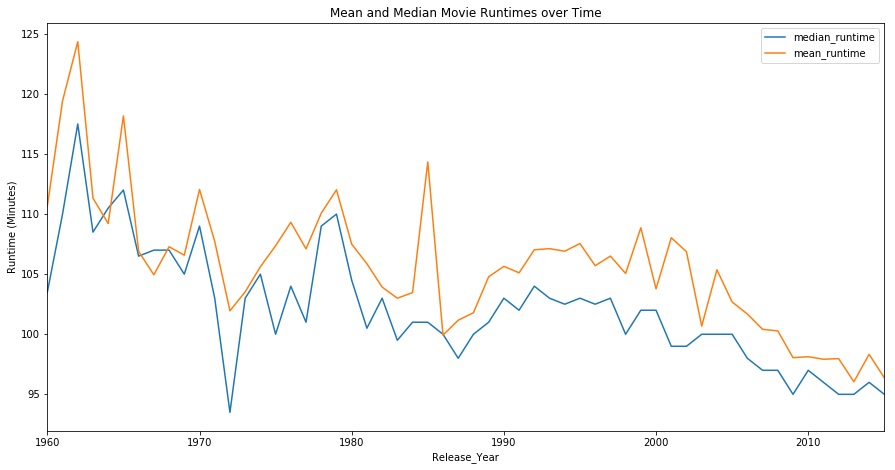

In [130]:
# time series exploration - runtime
plt.figure(figsize=(15,7.5))
df_runtime = df_clean[df_clean.runtime.notnull()]
df_runtime.groupby('release_year').median()['runtime'].plot(label = 'median_runtime', legend = True);
ax = df_runtime.groupby('release_year').mean()['runtime'].plot(label = 'mean_runtime', legend = True);
ax.set_title('Mean and Median Movie Runtimes over Time');
ax.set_ylabel('Runtime (Minutes)');
ax.set_xlabel('Release_Year');

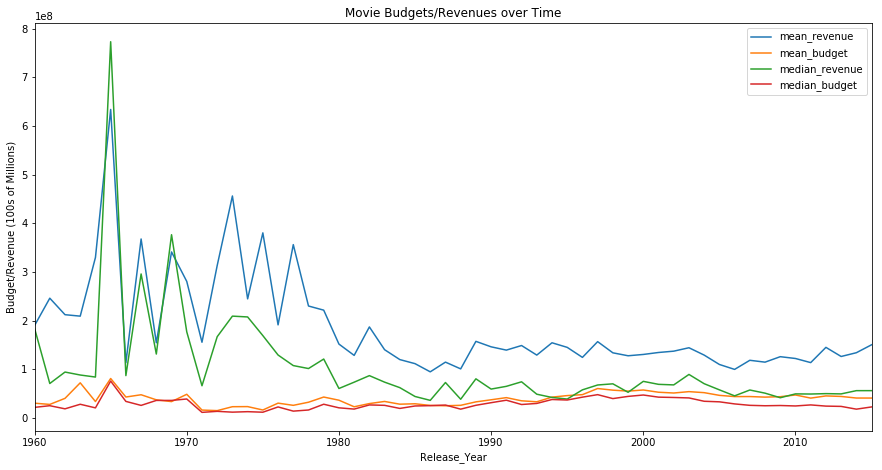

In [129]:
# time series exploration - runtime
plt.figure(figsize=(15,7.5))
df_temp = df_clean[df_clean.revenue_adj.notnull() & df_clean.budget_adj.notnull()]
df_temp.groupby('release_year').mean()['revenue_adj'].plot(label = 'mean_revenue', legend = True);
df_temp.groupby('release_year').mean()['budget_adj'].plot(label = 'mean_budget', legend = True);
df_temp.groupby('release_year').median()['revenue_adj'].plot(label = 'median_revenue', legend = True);
ax = df_temp.groupby('release_year').median()['budget_adj'].plot(label = 'median_budget', legend = True);
ax.set_title('Movie Budgets/Revenues over Time');
ax.set_ylabel('Budget/Revenue (100s of Millions)');
ax.set_xlabel('Release_Year');

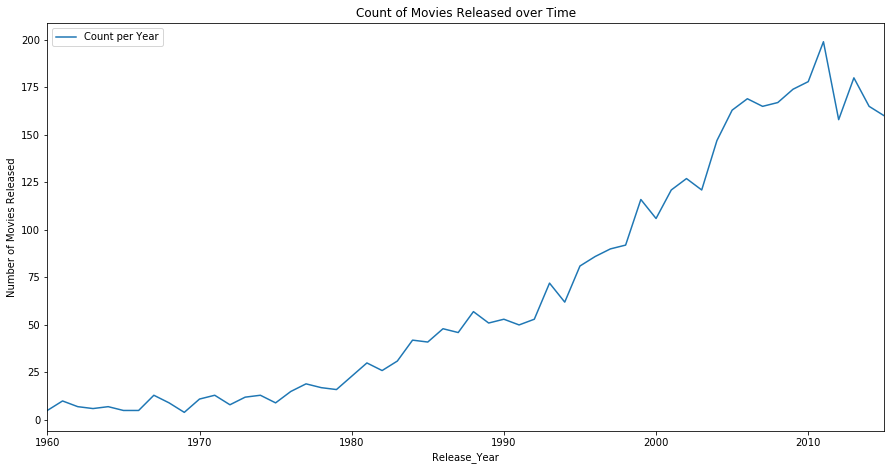

In [131]:
plt.figure(figsize=(15,7.5))
df_temp = df_clean[df_clean.revenue_adj.notnull() & df_clean.budget_adj.notnull()]
ax = df_temp.groupby('release_year').count()['revenue_adj'].plot(
    label = 'Count per Year', legend = True);
ax.set_title('Count of Movies Released over Time');
ax.set_ylabel('Number of Movies Released');
ax.set_xlabel('Release_Year');